Story 4: How much do we get paid?

URLS

In [10]:
url_DA = 'https://raw.githubusercontent.com/jonburns2454/data-608/refs/heads/main/DATA_ANALYST_BY_STATE.csv'
url_DE = 'https://raw.githubusercontent.com/jonburns2454/data-608/refs/heads/main/DATA_ENGINEER_BY_STATE.csv'
url_DS = 'https://raw.githubusercontent.com/jonburns2454/data-608/refs/heads/main/DATA_SCIENTIST_BY_STATE.csv'
url_MLE = 'https://raw.githubusercontent.com/jonburns2454/data-608/refs/heads/main/MACHINE_LEARNING_ENGINEER_BY_STATE.csv'

Data Scientist:

In [11]:
import pandas as pd
DS_DF = pd.read_csv(url_DS)
DA_DF = pd.read_csv(url_DA)
DE_DF = pd.read_csv(url_DE)
MLE_DF = pd.read_csv(url_MLE)

In [12]:
DS_DF = DS_DF.rename(columns={'Annual Salary': 'Annual Salary DS'})
DA_DF = DA_DF.rename(columns={'Annual Salary': 'Annual Salary DA'})
DE_DF = DE_DF.rename(columns={'Annual Salary': 'Annual Salary DE'})
MLE_DF = MLE_DF.rename(columns={'Annual Salary': 'Annual Salary MLE'})

In [13]:
DS_DF = DS_DF.iloc[:, :2]
DA_DF = DA_DF.iloc[:, :2]
DE_DF = DE_DF.iloc[:, :2]
MLE_DF = MLE_DF.iloc[:, :2]

In [14]:
full_df = DS_DF.merge(DA_DF, on='State').merge(DE_DF, on='State').merge(MLE_DF, on='State')


In [15]:
columns_to_convert = ['Annual Salary DS', 'Annual Salary DA', 'Annual Salary DE', 'Annual Salary MLE']
for column in columns_to_convert:
    full_df[column] = pd.to_numeric(full_df[column].str.replace('$', '').str.replace(',', ''))

In [16]:
columns_to_convert = ['Annual Salary DS', 'Annual Salary DA', 'Annual Salary DE', 'Annual Salary MLE']
data_melted = pd.melt(full_df, id_vars=['State'], value_vars=columns_to_convert, var_name='Job Role', value_name='Salary')

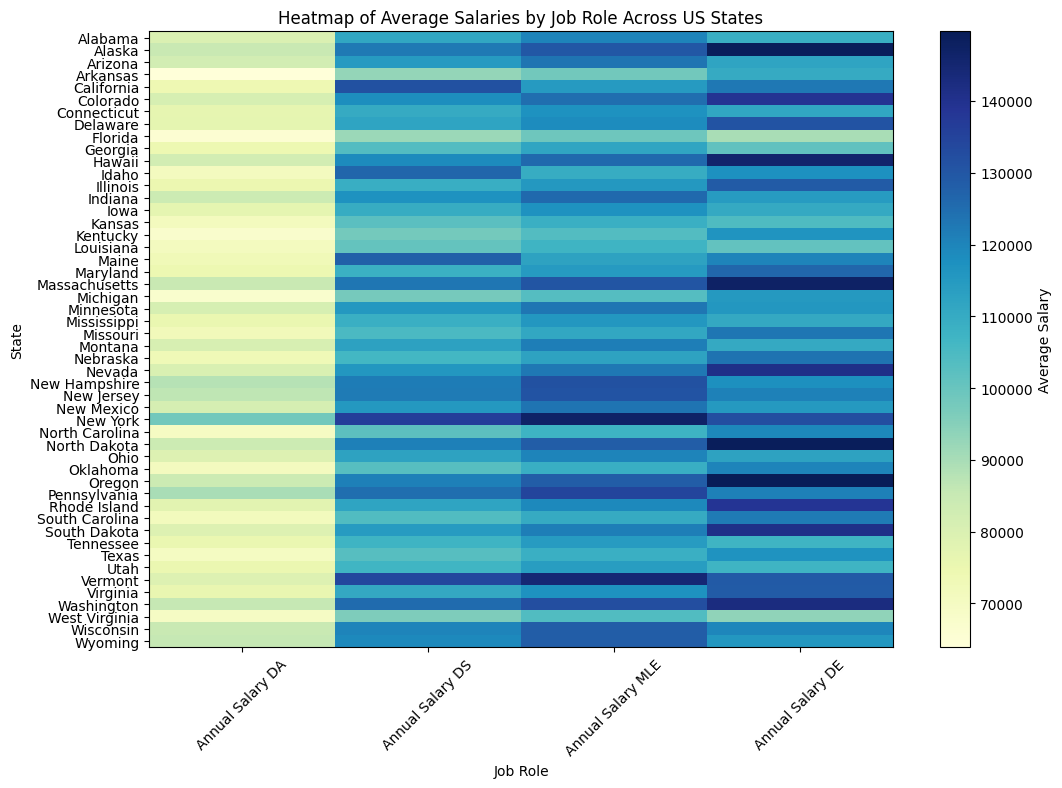

In [17]:
import numpy as np
import matplotlib.pyplot as plt
job_role_order = ['Annual Salary DA', 'Annual Salary DS', 'Annual Salary MLE', 'Annual Salary DE']


pivot_table = data_melted.pivot_table(index='State', columns='Job Role', values='Salary', aggfunc='mean')
pivot_table = pivot_table[job_role_order]

plt.figure(figsize=(12, 8))
plt.imshow(pivot_table, cmap='YlGnBu', aspect='auto')

plt.colorbar(label='Average Salary')

plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns, rotation=45)
plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)
plt.xlabel('Job Role')
plt.ylabel('State')
plt.title('Heatmap of Average Salaries by Job Role Across US States')

plt.show()

Data

Sources:
* https://www.ziprecruiter.com/Salaries/What-Is-the-Average-DATA-Engineer-Salary-by-State
* https://www.ziprecruiter.com/Salaries/What-Is-the-Average-DATA-Scientist-Salary-by-State
* https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Machine-Learning-Engineer-Salary-by-State
* https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Data-Analyst-Salary-by-State